# Principal Component Analysis(PCA)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Import Inbuilt dataset

In [3]:
from sklearn.datasets import load_breast_cancer
# from sklearn.datasets import load_digits


In [4]:
cancer=load_breast_cancer()


In [5]:
# check for keys
cancer.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
# get more info of dataset
print(cancer['DESCR'])


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
# Get the target values
print(cancer['target_names'])

['malignant' 'benign']


In [8]:
# get the column names
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
# store feature and target in variables
feature = cancer.data
target = cancer.target

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [13]:
# Visualiza the data
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [14]:
X_train, X_test, y_train, y_test = train_test_split(df, target, train_size = 0.7, random_state = 3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


## Apply Algorithm

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
my_model = LogisticRegression()

In [18]:
my_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
preds = my_model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [21]:
print(accuracy_score(y_test, preds))

0.935672514619883


## Apply PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca=PCA(n_components=5)

In [24]:
x_pca=pca.fit_transform(df)

In [26]:
df.shape

(569, 30)

In [27]:
x_pca.shape

(569, 5)

In [28]:
x_pca

array([[ 1.16014257e+03, -2.93917544e+02,  4.85783976e+01,
        -8.71197531e+00,  3.20004861e+01],
       [ 1.26912244e+03,  1.56301818e+01, -3.53945342e+01,
         1.78612832e+01, -4.33487404e+00],
       [ 9.95793889e+02,  3.91567432e+01, -1.70975298e+00,
         4.19934010e+00, -4.66529118e-01],
       ...,
       [ 3.14501756e+02,  4.75535252e+01, -1.04424072e+01,
        -9.77188104e+00, -6.15621283e+00],
       [ 1.12485812e+03,  3.41292250e+01, -1.97420874e+01,
        -2.36608814e+01,  3.56513324e+00],
       [-7.71527622e+02, -8.86431064e+01,  2.38890319e+01,
         2.54724855e+00, -1.47175663e+01]])

In [29]:
explained_variance = np.var(x_pca, axis=0)
print(explained_variance)

[4.43002671e+05 7.29725279e+03 7.02596776e+02 5.45526944e+01
 3.98199123e+01]


In [31]:
explained_variance_ratio = explained_variance / np.sum(explained_variance)

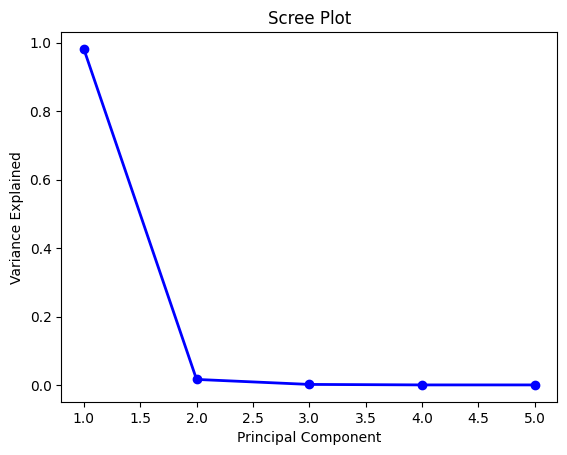

In [32]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components) + 1
plt.plot(PC_values, explained_variance_ratio, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, target, train_size = 0.7, random_state = 3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 5)
(171, 5)
(398,)
(171,)


In [34]:
my_model.fit(X_train,y_train)

LogisticRegression()

In [35]:
preds = my_model.predict(X_test)

In [36]:
print(accuracy_score(y_test, preds))

0.9649122807017544
